## Rotorcraft pitch response for different rotor hinge spring constants  with no flap dynamics
**Source: Prof. Marilena Pavel**

In the following tutorial we will calculate the pitch reponse for different rotor hinge spring constants to show how the spring constant effects the dynamics of a rotorcraft. We will do so by integrating the pitch equation of motion. The basic equation of motion for angular acceleration is as follows:

$$
\Sigma M = I_g \alpha
$$

In order to apply this to helicopter the sum of moments in the pitch plane can be described as follows:

$$
I_y \frac{d\omega}{dt} = \tau_c 

$$

Where $\tau_c$  is defined as follows for both hingeless and teetering rotor craft:

$$
\begin{aligned}
\tau_{c_{h-}} = \theta_{iy} \left(\frac{N}{2} k_{\beta} + mgh\right) + \frac{16}{\text{lok}} \frac{q}{\omega} \theta_{iy} \cdot \text{cyc}

\end{aligned}
\hspace{1 cm}
\begin{aligned}
\tau_{c_{teet}} = \theta_{iy} \left(\frac{N}{2} k_{\beta0} + mgh\right) + \frac{16}{\text{lok}} \frac{q}{\omega} \theta_{iy} \cdot \text{cyc}
\end{aligned}
$$

Here $lok$ characterizes the importance of centrifugal effects relative to inertial and gravitational effects on the rotor blades. In other words, it measures the relative strength of centrifugal forces compared to other forces acting on the rotor blades. $\omega$ represents the angular velocity of the blades. $\theta_{iy}$ is related to the hinge spring constants of the blades. $cyc$ is the cyclic input of the pilot.





## Introduce relevant constants and import the relevant libraries

In order to perform the dynamic analysis we must first set the physical properties of the aircraft. The relevant parameters are shown hereunder.

- **TODO** write some further elaboration on these parameters


In [21]:
import numpy as np
import matplotlib.pyplot as plt

lok = 6  # Lock number (-)
mass = 2200  # Rotorcraft mass (kg)
vtip = 200  # Rotor tip speed (m/sec)
rotor_radius= 7.32  # Rotor radius (m)
iy = 10625  # Rotorcraft moment of inertia (kgm^2)
h = 1  # Distance from vehicle CG to rotor hub
kbeta = 46000  # Rotor hinge spring hingeless (Nm)
kbeta0 = 0  # Rotor hinge spring teetering (Nm)
omega= vtip / rotor_radius
N = 3  # Number of blades

thiy = (mass * 9.81 * h + N / 2 * kbeta) / iy
thiy0 = (mass * 9.81 * h + N / 2 * kbeta0) / iy


## Set up of the numerical integration

To start the simulation some initalization has to be done first. This can be seen hereunder where we create the arrays that will hold the pitch rates and define the lenght of the simulation. 

In [25]:

# Starting integration for the pitch equation of motion
t_end = 20  # Time (sec)
step = 0.002  # Time step (sec)
t_arr = int(t_end / step)  # Time step

# INITIAL CONDITIONS
q = np.zeros(t_arr + 1)  # Pitch rate (rad/sec)
q0 = np.zeros(t_arr + 1)  # Initial pitch rate (rad/sec)
t = np.zeros(t_arr + 1)  # Initial time t=0 sec
input_cyc = np.radians(-1)  # Pilot cyclic control (1 deg/sec)


## Performing the numerical integration

Now that the setup has been completed we can execute the integration by using a simple Forward Euler scheme defined as follows.

$$
f_{x+1} = f_{x} + \frac{df}{dx}|_{x} dx
$$

Applying the same concept to our pitch equation of motion results in the following.

In [26]:
# STARTING THE PROGRAM
for i in range(t_arr):
    a1 = (-16 / lok) * (q[i] / omega)  # Calculation flapping angle (rad)
    a10 = (-16 / lok) * (q0[i] / omega)

    dq = -thiy * (-a1 + input_cyc)  # Pitch rate response q for hingeless rotorcraft
    dq0 = -thiy0 * (-a10 + input_cyc)  # Pitch rate response q for teetering rotorcraft

    # INTEGRATION
    q[i + 1] = q[i] + dq * step
    q0[i + 1] = q0[i] + dq0 * step
    t[i + 1] = t[i] + step


## Visualizing results

Now that the results have been computed we would like to visualize them, we'll use the library matplotlib.pyplot for this purpose which we imported in the beginning. The results are as follows.

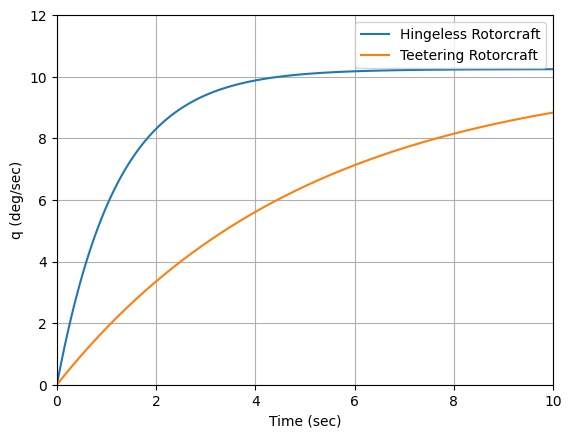

In [28]:
# Convert q and q0 from radians/second to degrees/second for plotting
q_deg = np.degrees(q)
q0_deg = np.degrees(q0)

plt.plot(t, q_deg, label='Hingeless Rotorcraft')
plt.plot(t, q0_deg, label='Teetering Rotorcraft')
plt.xlabel('Time (sec)')
plt.ylabel('q (deg/sec)')
plt.axis([0, 10, 0, 12])
plt.legend()
plt.grid()
plt.show()
